# ESCUELA POLITÉCNICA NACIONAL

## MÉTODOS NUMÉRICOS

### TAREA 3

David Alejandro Puga Novoa - GR1CC - 31/10/2024

# Implementación de gráficas, imports y funciones basicas

Para los literales que solicitan una gráfica, utilizaremos las librerias "Numpy" es una librería que se especializa en el cálculo y manejo de datos numéricos mientras que la librería "Matplotlib" se encarga de graficar en dos dimensiones.

En este caso, el código que resolverá las cuestiones en los ejercicios es el dispuesto en el aula virtual, solamente que explicado en este documento.

En los signos se interpretaran como una función sencilla que devuelve, en pocas palabras, el signo del número flotante que reciba como parámetro. Nos será de gran utilidad en cuanto a la búsqueda de la raíz en el problema.

# Función bisección

Manejamos la clase Callable que nos servirá para llamar a distintas funciones (ecuaciones) y entregárselas a la funcion bisección como parámetro. Entonces los parámetros a recibir para "bisection" son:

- El Límite inferior del dominio dado por "a".
- El Límite superior del dominio dado por "b".
- Función (equation) par analizar
- "Callable" informa que la función debe tener entrada float y uno de salida del mismo tipo.
- La Tolerancia de error dado por "tol".
- El Límite de iteraciones dado por "N".


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

from typing import Callable

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int
) -> tuple[float, int] | None:
    i = 1
    
    assert a < b, "a not lower than b, the interval is not valid."

    assert (
        equation(a) * equation(b) < 0
    ), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a 
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        
        if FP == 0 or (b - a) / 2 < tol:
            return p, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
            
        else:
            b = p

    return p, i

# 1. Conjunto de ejercicios

### 1.1. Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para $x^{3} - 7x^{2} + 14x - 6 = 0$ en cada intervalo. 

#### a) [0,1]

In [3]:
r1, i = bisection(a = 0, b = 1, equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'El resultado de la biseccion da la raíz {r1} en {i} iteraciones')

El resultado de la biseccion da la raíz 0.5859375 en 6 iteraciones


#### b)[1 , 3.2]

In [4]:
r2, i = bisection(a = 1, b = 3.2, equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'El resultado de la biseccion da la raíz {r2} en {i} iteraciones')

El resultado de la biseccion da la raíz 3.0023437500000005 en 7 iteraciones


#### c)[3.2 , 4]

In [5]:
r3, i = bisection(a = 3.2, b = 4, equation = lambda x : x**3 - 7*x**2 + 14*x - 6, tol = 10**(-2), N = 20)
print(f'El resultado de la biseccion da la raíz {r3} en {i} iteraciones')

El resultado de la biseccion da la raíz 3.41875 en 6 iteraciones


### 1.4.

#### a) Dibuje las gráficas para $y = x^2 - 1$ y $y = e^{1 - x^2}$

Empezamos graficando la función $y = x^2 - 1$:


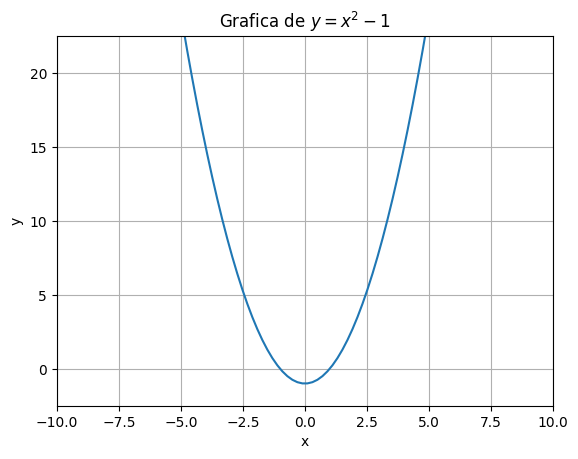

In [6]:
X = np.linspace(-10, 10, 100)
Y = [(lambda x : x**2 - 1)(x) for x in X]

plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de $y = x^2 - 1$')
ax = plt.gca()
ax.set_ylim([-2.5, 22.5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()


Y seguido de esto gráfica para la función $y = e^{1 - x^2}$:


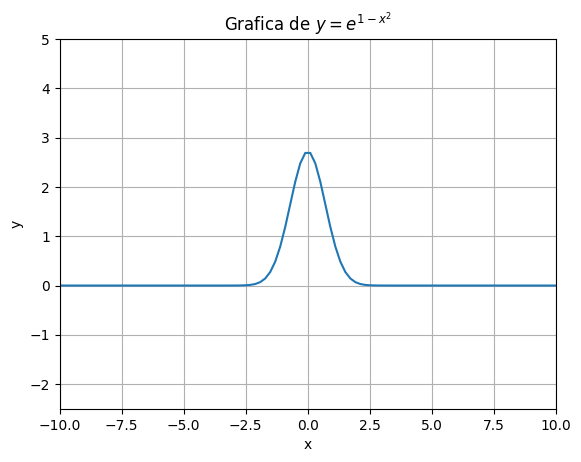

In [7]:
Y = [(lambda x : math.exp(1 - x**2))(x) for x in X]

plt.plot(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Grafica de $y = e^{1 - x^2}$')
ax = plt.gca()
ax.set_ylim([-2.5, 5])
ax.set_xlim([-10, 10])
plt.grid(True)
plt.show()

####  b) Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor (-2, 0) con $x^2 - e^{1 - x^2} - 1$.

Por bisección tenemos:

In [8]:
r, i = bisection(a = -2, b = 0, equation = lambda x : x**2 - math.exp(1 - x**2) - 1, tol = 10**(-3), N = 20)
print(f'El resultado de la biseccion da la raíz {r} en {i} iteraciones')

El resultado de la biseccion da la raíz -1.2509765625 en 10 iteraciones


# 2. Ejercicios aplicados

### 2.1. Un abrevadero de longitud 𝐿 tiene una sección transversal en forma de semicírculo con radio 𝑟. (Consulte la figura adjunta.) Cuando se llena con agua hasta una distancia ℎ a partir de la parte superior, el volumen 𝑉 de agua es

$$V = L[0.5 \pi r^2 - r^2 \arcsin{\frac{h}{r}} - h(r^2 - h^2)^{\frac{1}{2}}]$$

Suponga que 𝐿 = 10 𝑐𝑚, 𝑟 = 1 𝑐𝑚 y 𝑉 =12.4 𝑐𝑚. Encuentre la profundidad del agua en el abrevadero 
dentro de 0.01 𝑐𝑚. 

Como dicta el ejercicio el 0.01 cm se puede interpretar como el error absoluto que se puede tolerar al calcular $h$. 

Entonces empezamos reemplazando los valores en la ecuación original, tal que:

$$12.4 = 10[0.5 \pi (1)^2 - 1^2 \arcsin{\frac{h}{1}} - h(1^2 - h^2)^{\frac{1}{2}}]$$

Utlizaremos método de bisección para resolverlo de manera mas sencilla. La anterior ecuación se tiene que igualar a cero, para así, calcular las raices que h puede tener.

$$0 = 10[0.5 \pi (1)^2 - 1^2 \arcsin{\frac{h}{1}} - h(1^2 - h^2)^{\frac{1}{2}}] - 12.4$$

Implementa en código con una función lambda.

In [9]:
r, i = bisection(a = 0, b = 1, equation = lambda x : 10 * (0.5 * math.pi - math.asin(x) - x * (1 - x**2)**0.5) - 12.4, tol = 0.01, N = 20)
print(f'La profundidad del agua (h) es aproximadamente: {r} cm, calculado en {i} iteraciones')

La profundidad del agua (h) es aproximadamente: 0.1640625 cm, calculado en 6 iteraciones


## 2.2Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad. Suponga que un objeto con masa 𝑚 cae desde una altura 𝑠 y que la altura del objeto después de 𝑡 segundos es 

$$s(t) = s_0 - \frac{mg}{k} t + \frac{m^2g}{k^2} (1 - e^{\frac{-kt}{m}})$$

donde 𝑔 = 9.81 $\frac{m}{s^2}$ y 𝑘 representa el coeficiente de la resistencia del aire en $\frac{Ns}{m}$. Suponga $s_0 = 300 m$, $m = 25 kg$ y $k = 0.1 \frac{Ns}{m}$. Encuentre, dentro de 0.01 𝑠𝑒𝑔𝑢𝑛𝑑𝑜𝑠, el tiempo que tarda un cuarto de kg en 
golpear el piso. 

Se necesita de métodos numéricos para resolverlo por ello en 0.01 segundos es el error absoluto admisible será nuestra raíz. Reemplazamos los datos dados en el enunciado para la fórmula, tal que la ecuación esté respecto al tiempo.

$0 = 300 - \frac{(25)(9.81)}{0.1} t + \frac{(25)^2(9.81)}{(0.1)^2} (1 - e^{\frac{-(0.1)t}{25}})$

Sutituimos adicionalmente a $s(t) = 0$ porque la función representa la altura en la que el objeto se encuentra en cierto momento, pero el problema nos pide el tiempo para cuando toque el suelo. Tomando como el sistema de referencia para el eje y el suelo, entonces la altura es cero.

Implementamos la función bisección:

In [10]:
r, i = bisection(a = 7, b = 8, equation = lambda x : 300 - (25*9.81*x)/0.1 + (625*9.81)*(1 - math.exp(-(0.1)*x/25))/0.1**2, tol = 0.01, N = 20)
print(f'El tiempo en tocar el suelo (t) es: {r} segundos, calculado en {i} iteraciones')

El tiempo en tocar el suelo (t) es: 7.8671875 segundos, calculado en 6 iteraciones


# 3. Ejercicios teóricos

### 3.1. Use el teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de $x^3 - x - 1 = 0$ que se encuentra dentro del intervalo (1, 2). Encuentre una aproximación para la raíz con este grado de precisión. 

Implementamos bisección con los parámetros ya que no se encuentra el teorema en la tarea. 

In [11]:
r, i = bisection(a = 1, b = 2, equation = lambda x : x**3 - x - 1, tol = 10**(-4), N = 20)
print(f'El resultado de la biseccion da la raíz {r} en {i} iteraciones')

El resultado de la biseccion da la raíz 1.32476806640625 en 13 iteraciones
